In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
iris = load_iris()

In [3]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df_class = iris.target

In [5]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


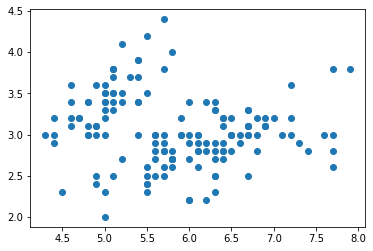

In [6]:
plt.scatter(x = df['sepal length (cm)'], y = df['sepal width (cm)'])

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, df_class, test_size=0.3)

In [8]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [9]:
lda = LinearDiscriminantAnalysis()

In [10]:
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [11]:
lda.predict(X_test)

array([0, 0, 0, 1, 0, 1, 1, 2, 2, 1, 1, 0, 0, 0, 0, 1, 0, 1, 2, 0, 2, 0,
       2, 2, 2, 1, 2, 1, 2, 0, 0, 0, 1, 2, 1, 0, 2, 0, 2, 2, 2, 1, 1, 1,
       1])

In [12]:
result = pd.DataFrame([y_test, lda.predict(X_test)]).T

In [13]:
result.head(10)

,0,1
0,0,0
1,0,0
2,0,0
3,1,1
4,0,0
5,1,1
6,1,1
7,1,2
8,2,2
9,1,1


In [14]:
from sklearn.metrics import accuracy_score

In [15]:
accuracy_score(y_test, lda.predict(X_test))

0.9555555555555556

In [16]:
lda.means_

array([[5.01764706, 3.45294118, 1.44411765, 0.24705882],
       [5.99714286, 2.75142857, 4.26857143, 1.32285714],
       [6.64166667, 2.96388889, 5.58333333, 2.00277778]])

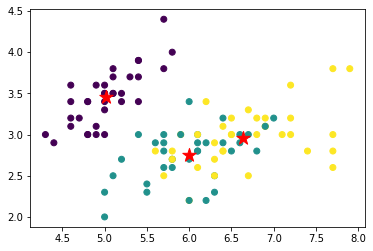

In [17]:
plt.scatter(X_train['sepal length (cm)'], X_train['sepal width (cm)'], c=y_train)
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s = 200 , marker='*')

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler = StandardScaler()

In [20]:
data = df[['sepal length (cm)', 'sepal width (cm)']]
data

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [21]:
data_scaled = scaler.fit_transform(data)

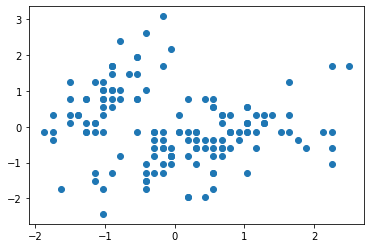

In [22]:
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], cmap='autumn', )

In [23]:
from sklearn.cluster import KMeans 

In [24]:
k_inertia = []
ks = range (2, 10)

In [25]:
for k in ks:
    clf_kmeans = KMeans(n_clusters = k)
    clusters_kmeans = clf_kmeans.fit_predict(data_scaled)
    k_inertia.append(clf_kmeans.inertia_)

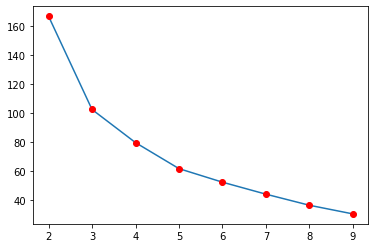

In [26]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia, 'ro' )

In [27]:
#оптимальное число кластеров равно 3

In [28]:
kmeans = KMeans(n_clusters=3)

clusters = kmeans.fit_predict(data_scaled)
clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2,
       2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2, 2,
       1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

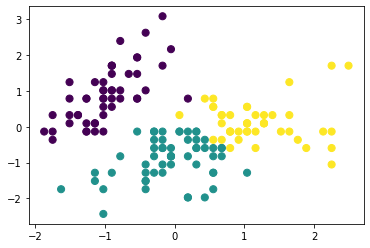

In [29]:
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=clusters, s=50)